# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load Data

In [2]:
df = pd.read_csv(r'C:\Users\ENEDZI\Downloads\dataset\Billionaires Statistics Dataset.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Primary EDA

In [3]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [5]:
df.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

# Data Cleaning

### 1- Remove Redundant Columns

In [6]:
(df['industries'] == df['category']).all()

True

In [7]:
df.drop(columns=['birthDay', 'birthMonth', 'birthYear', 'longitude_country',
                'latitude_country', 'industries']
        , inplace=True)

### 2- Fill NaN values

In [8]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['country'].fillna(df['country'].mode(), inplace=True)

only `1` missing value for state column which its country is united states and located in south (fill it with mode of south states which is `Florida`)

In [9]:
df.loc[df.country=='United States', 'state'] = df[df.country == 'United States'].state.fillna('Florida')

In [10]:
state_region = df.groupby(['residenceStateRegion','state'], as_index=False).count().sort_values(by=['residenceStateRegion', 'rank'], ascending=False).iloc[:,:3]
state_region

,residenceStateRegion,state,rank
37,West,California,176
42,West,Nevada,18
38,West,Colorado,13
45,West,Washington,13
36,West,Arizona,12
44,West,Utah,6
41,West,Montana,4
43,West,Oregon,3
39,West,Hawaii,2
40,West,Idaho,1


Find `NaN` values for `residenceStateRegion` column

In [11]:
df.loc[(df.country == 'United States') & (df.residenceStateRegion.isna()==True)]['state']

358     California
521       Illinois
963       Illinois
1339          Ohio
1733       Florida
2167         Texas
2547       Florida
Name: state, dtype: object

In [12]:
df.at[358, 'residenceStateRegion'] = 'West'
df.at[521, 'residenceStateRegion'] = 'Midwest'
df.at[963, 'residenceStateRegion'] = 'Midwest'
df.at[1339, 'residenceStateRegion'] = 'Midwest'
df.at[1733, 'residenceStateRegion'] = 'South'
df.at[2167, 'residenceStateRegion'] = 'South'
df.at[2547, 'residenceStateRegion'] = 'South'

# Visualization

### Q1: Top 10 Richest People

Text(0.5, 1.0, 'Top 10 Richest in World')

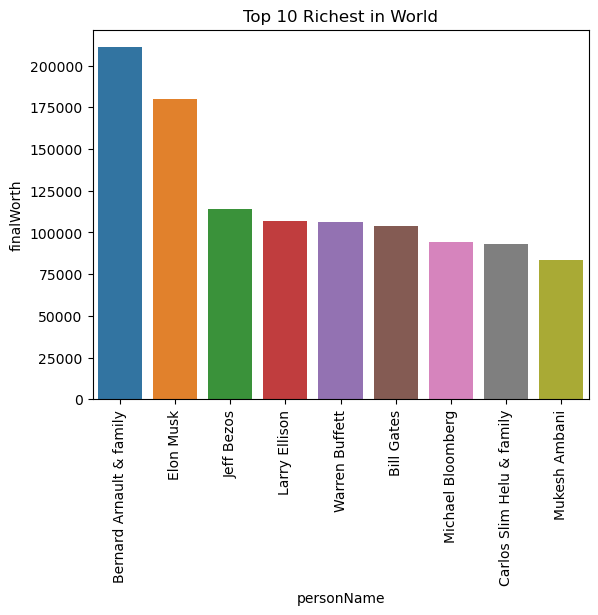

In [13]:
g = sns.barplot(data=df[df['rank'] < 10], x='personName', y='finalWorth')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Top 10 Richest in World')

### Q2: Top 20 Richest in United States

Text(0.5, 1.0, 'Top 10 Richest in World')

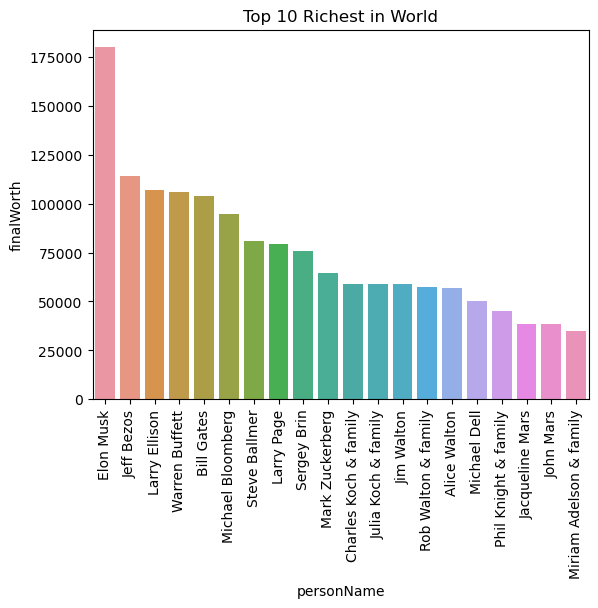

In [14]:
g = sns.barplot(data=df[df.country =='United States'][:20], x='personName', y='finalWorth')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Top 10 Richest in World')

### Q3: Female/Male Portion of Billionaires

Text(0.5, 1.0, 'Ration of Female vs Male Bilionaires')

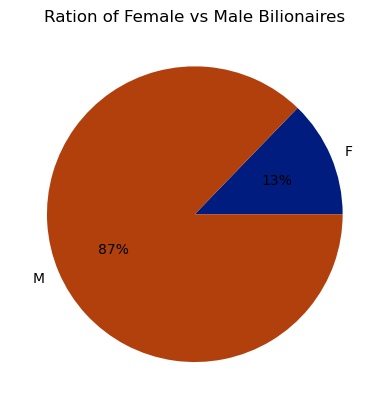

In [15]:
portion = df.groupby(by='gender', as_index=False).count().iloc[:,:2]
plt.pie(x= portion['rank'], labels=portion.gender, colors=sns.color_palette('dark'), autopct='%.0f%%')
plt.title('Ration of Female vs Male Bilionaires')

### Q4: Youngest and Oldest Billionair

In [16]:
youngest = df.loc[df.age == df.age.min()] # Youngest
oldest = df.loc[df.age == df.age.max()] # Oldest

pd.concat([youngest, oldest])

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,organization,...,residenceStateRegion,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
823,818,3500,Fashion & Retail,Clemente Del Vecchio,18.0,Italy,Milan,Eyeglases,Italy,NaN,...,NaN,110.62,0.6,"$2,001,244,392,042",61.9,101.9,82.9,24.3,59.1,60297396.0
2180,2133,1300,Finance & Investments,George Joseph,101.0,United States,Los Angeles,Insurance,United States,NaN,...,West,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0


In [17]:
df.age.quantile([0, 0.25, 0.5, 0.75, 1])


0.00     18.000000
0.25     56.000000
0.50     65.140194
0.75     74.000000
1.00    101.000000
Name: age, dtype: float64

### Q5: number of billionaires in different age intervals

<Axes: xlabel='age cls', ylabel='count'>

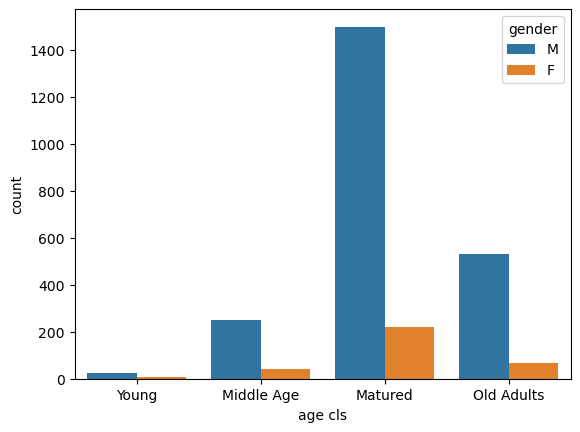

In [18]:
df['age cls'] = pd.cut(df.age, [18, 35, 50, 75,121], labels=['Young', 'Middle Age', 'Matured', 'Old Adults'])

sns.countplot(data=df, x='age cls', hue='gender')

### Q6: Numebr of Billionaries per country

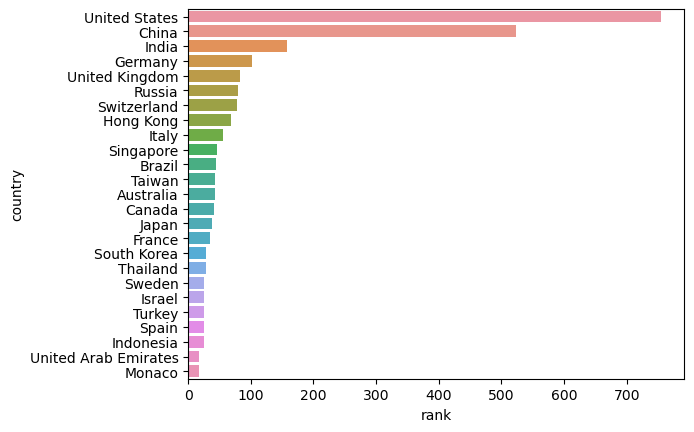

In [19]:
#sns.countplot(data=df, x='country')
top15 = df.groupby('country', as_index=False).count().sort_values(by='rank', ascending=False)

g = sns.barplot(data=top15.iloc[:25, :], y='country', x='rank')


### Q7: Portion of Self-Made or inherited wealth

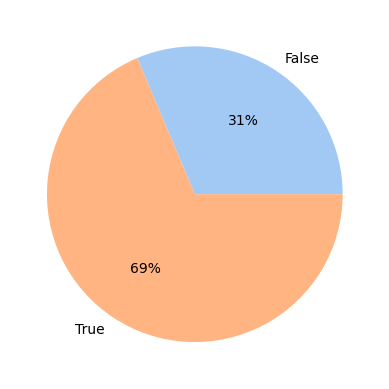

In [20]:
selfmade = df.groupby('selfMade', as_index=False).count()

plt.pie(x= selfmade['rank'], labels=selfmade.selfMade ,colors=sns.color_palette('pastel'), autopct='%.0f%%');


### Q8: features correlation

<Axes: >

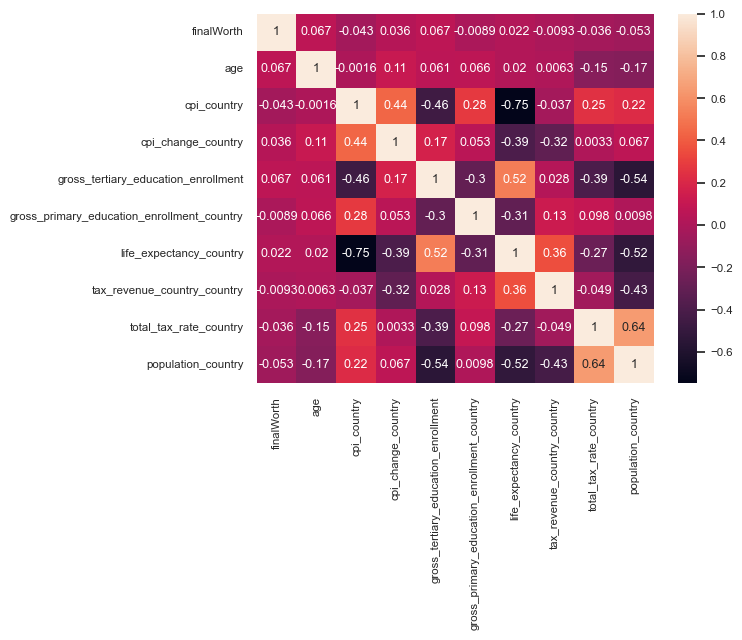

In [21]:
sns.set(font_scale=0.75)  # crazy big

sns.heatmap(df.select_dtypes(['int64', 'float64']).drop(columns=['rank']).corr(), annot=True)

### Q9: Bilionaires per Category

<Axes: xlabel='count', ylabel='category'>

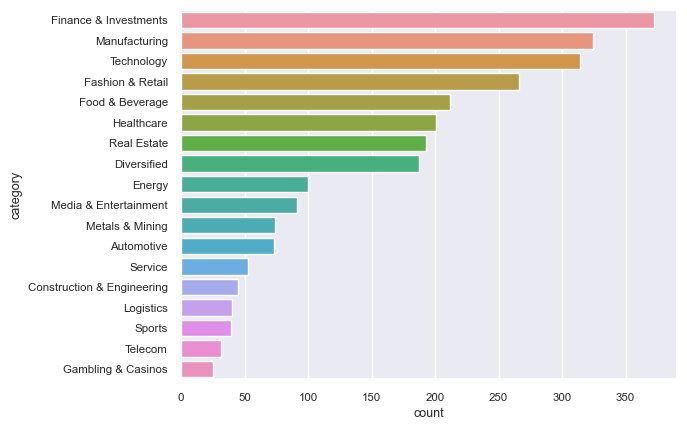

In [22]:
xx = df.sort_values(by='category')['category'].value_counts()
xx =xx.reset_index()

sns.barplot(y = 'category', x = 'count', data = xx)